In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap, BoundaryNorm


# Define the file path and names
base_path = ""
locations = ['Yoyogi', 'Nerima', 'Koiwa','Higashi_Nakano','Aoyama','Ayase','Nakano_Sakagami','Sengakuji','Shinkiba','Kotake_Mukaihara']

# Prepare the dataframes to store combined results
combined_decision_variables = pd.DataFrame()
combined_average_areas = pd.DataFrame()
combined_final_area = pd.DataFrame()
combined_price_layers = pd.DataFrame()

# Function to read data from excel files and add file info
def read_excel_sheets(file_path, location, file_type):
    decision_variables = pd.read_excel(file_path, sheet_name='Decision_Variables')
    decision_variables['Location'] = location
    decision_variables['File_Type'] = file_type

    average_areas = pd.read_excel(file_path, sheet_name='Average_Areas')
    average_areas['Location'] = location
    average_areas['File_Type'] = file_type

    final_area = pd.read_excel(file_path, sheet_name='Final_Area')
    final_area['Location'] = location
    final_area['File_Type'] = file_type

    return decision_variables, average_areas, final_area

# Iterate over each location and read the corresponding files
for location in locations:
    # Read Simple_number_change_optimization_results files
    simple_file = os.path.join(base_path, f"Simple_number_change_optimization_results_{location}.xlsx")
    if os.path.exists(simple_file):
        decision_variables, average_areas, final_area = read_excel_sheets(simple_file, location, "Simple_number_change_optimization_results")
        combined_decision_variables = pd.concat([combined_decision_variables, decision_variables])
        combined_average_areas = pd.concat([combined_average_areas, average_areas])
        combined_final_area = pd.concat([combined_final_area, final_area])
    
    # Read optimization_results files
    optimization_file = os.path.join(base_path, f"optimization_results_{location}.xlsx")
    if os.path.exists(optimization_file):
        decision_variables, average_areas, final_area = read_excel_sheets(optimization_file, location, "optimization_results")
        combined_decision_variables = pd.concat([combined_decision_variables, decision_variables])
        combined_average_areas = pd.concat([combined_average_areas, average_areas])
        combined_final_area = pd.concat([combined_final_area, final_area])
    
    # Read Price_optimization_results files
    price_file = os.path.join(base_path, f"Price_optimization_results_{location}.xlsx")
    if os.path.exists(price_file):
        decision_variables, average_areas, final_area = read_excel_sheets(price_file, location, "Price_optimization_results")
        price_layers = pd.read_excel(price_file, sheet_name='Price_Layers')
        price_layers['Location'] = location
        price_layers['File_Type'] = "Price_optimization_results"
        
        combined_decision_variables = pd.concat([combined_decision_variables, decision_variables])
        combined_average_areas = pd.concat([combined_average_areas, average_areas])
        combined_final_area = pd.concat([combined_final_area, final_area])
        combined_price_layers = pd.concat([combined_price_layers, price_layers])

# Write the combined results into a new Excel file
output_path = os.path.join(base_path, "combined_optimization_results_with_file_info_0701.xlsx")
with pd.ExcelWriter(output_path) as writer:
    combined_decision_variables.to_excel(writer, sheet_name='Decision_Variables')
    combined_average_areas.to_excel(writer, sheet_name='Average_Areas')
    combined_final_area.to_excel(writer, sheet_name='Final_Area')
    if not combined_price_layers.empty:
        combined_price_layers.to_excel(writer, sheet_name='Price_Layers')

output_path


'/Users/liqiao/Desktop/UTokyo/Food/2023_spatial_distribution_recipes/202406/Part3/0617/combined_optimization_results_with_file_info_0701.xlsx'

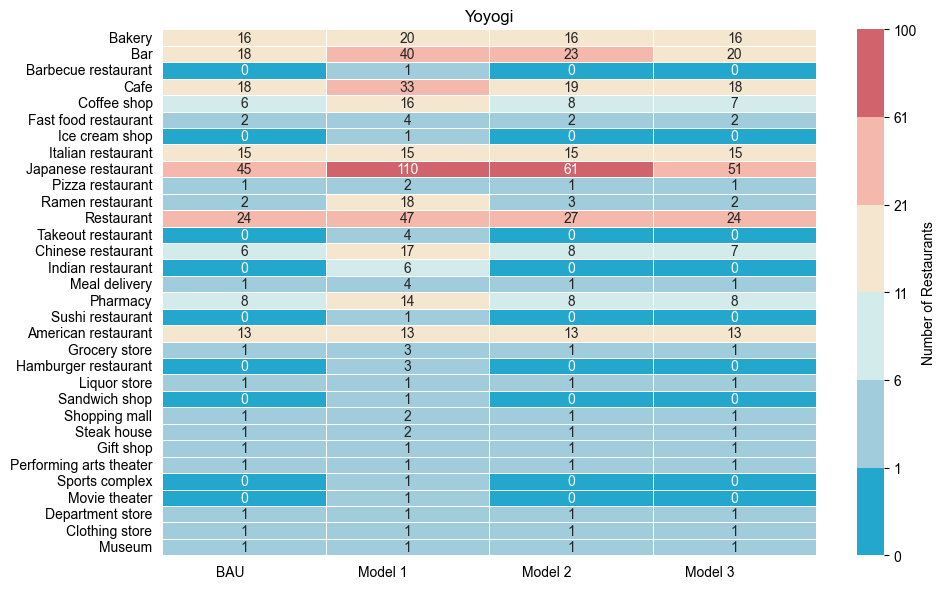

<Figure size 640x480 with 0 Axes>

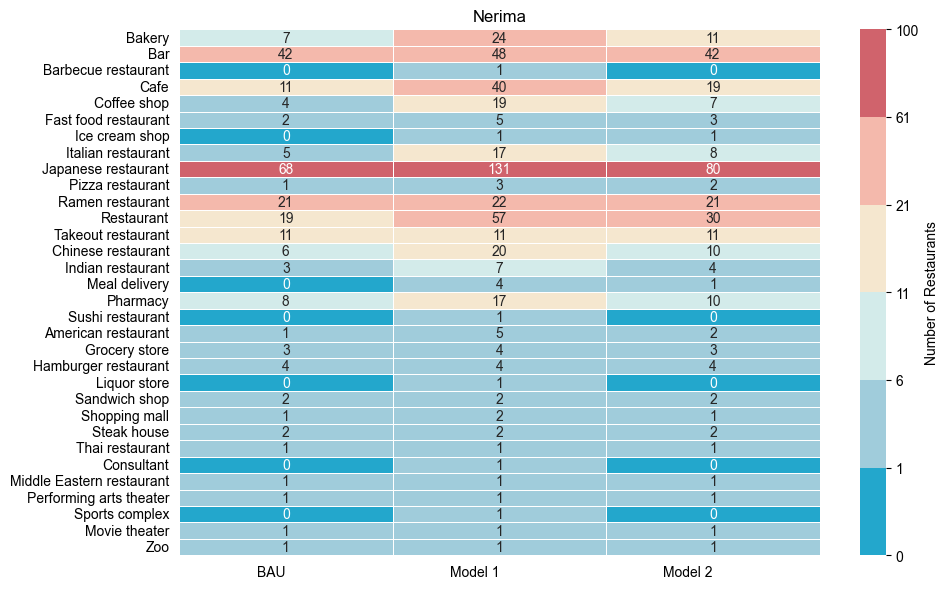

<Figure size 640x480 with 0 Axes>

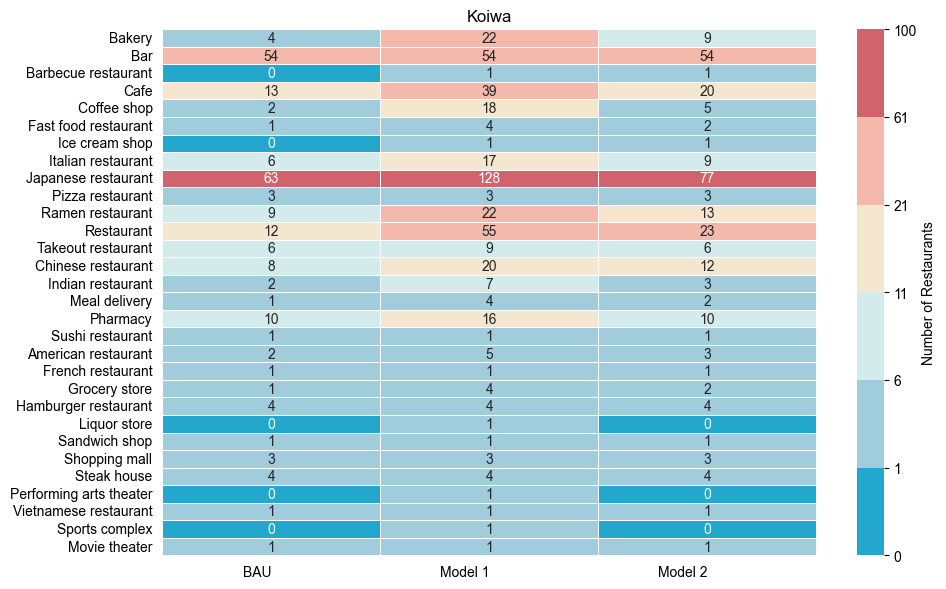

<Figure size 640x480 with 0 Axes>

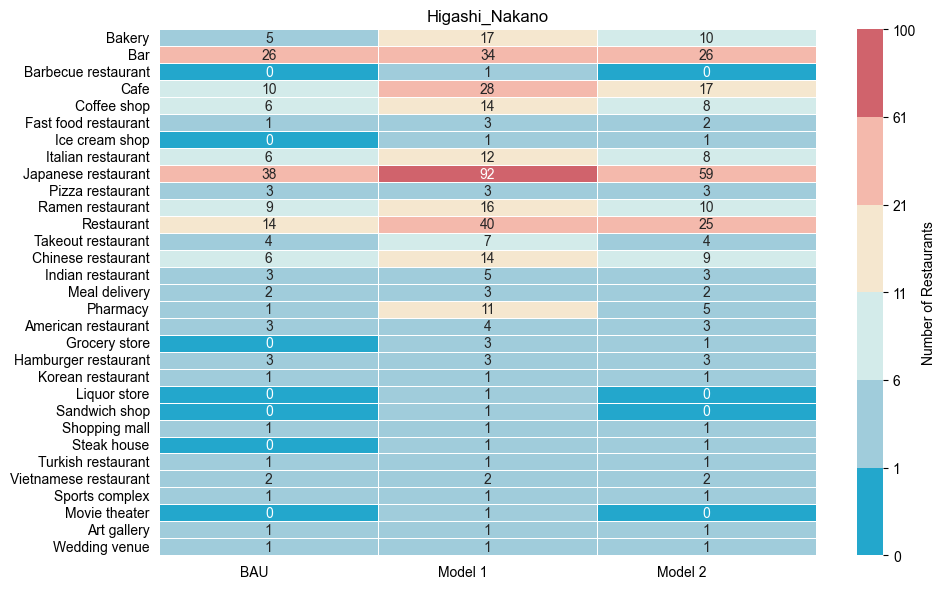

<Figure size 640x480 with 0 Axes>

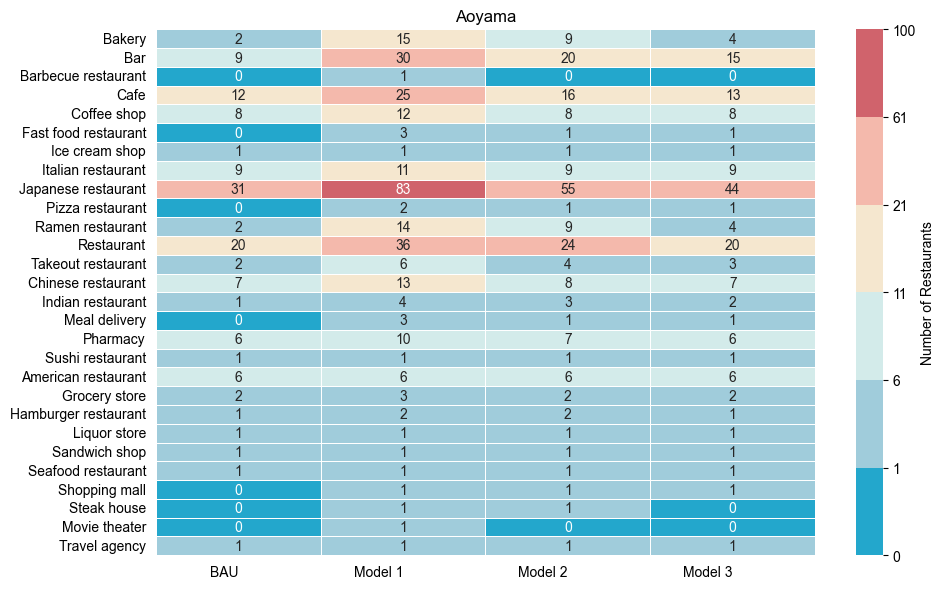

<Figure size 640x480 with 0 Axes>

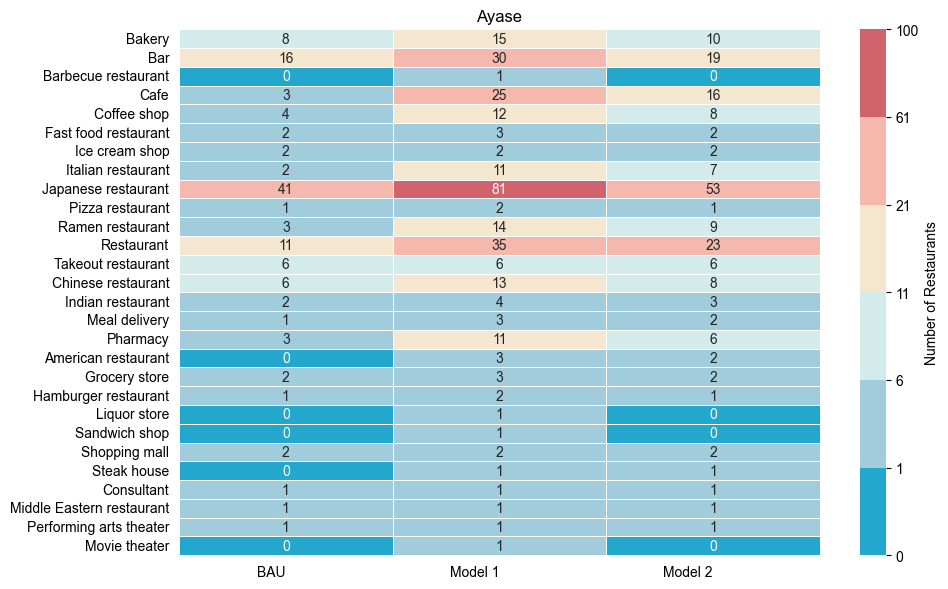

<Figure size 640x480 with 0 Axes>

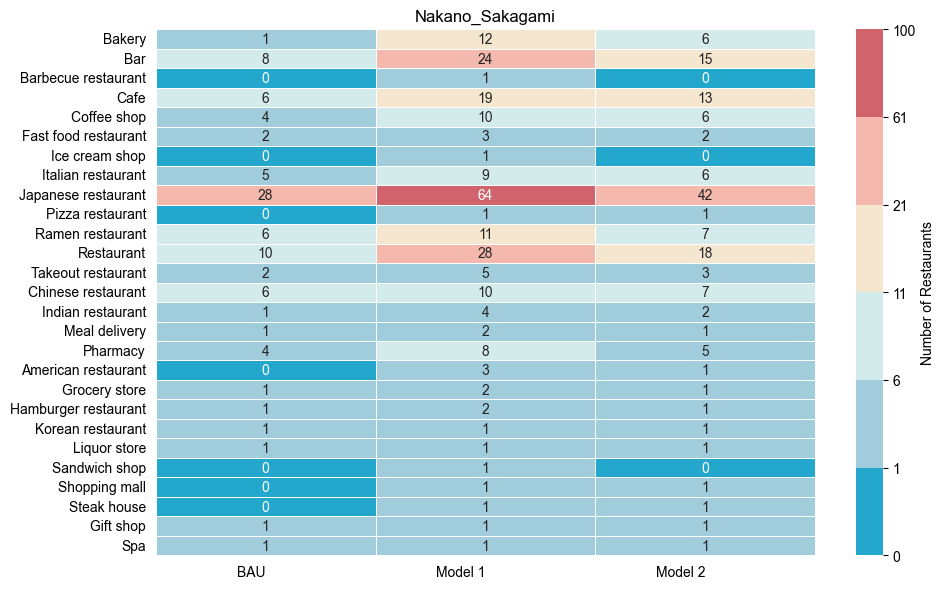

<Figure size 640x480 with 0 Axes>

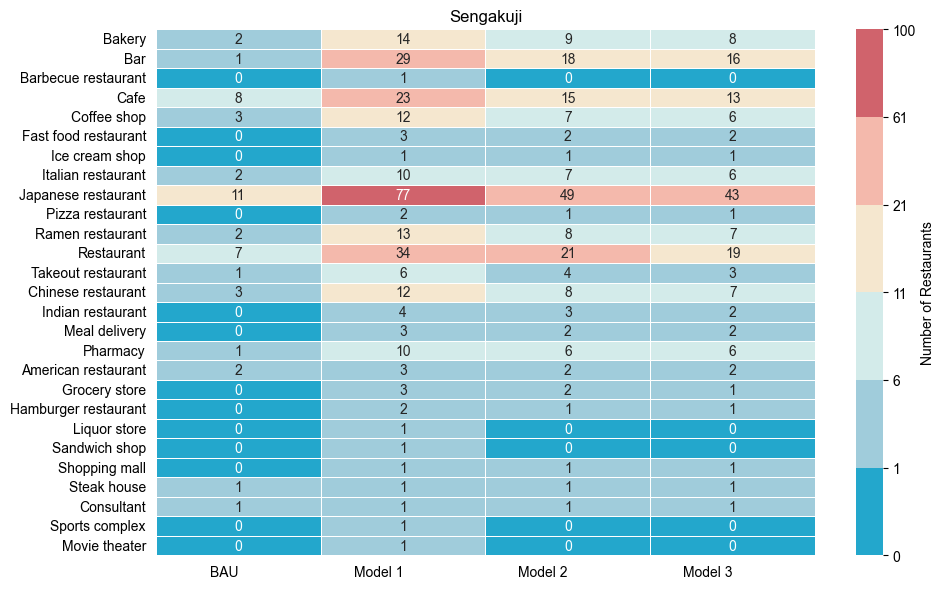

<Figure size 640x480 with 0 Axes>

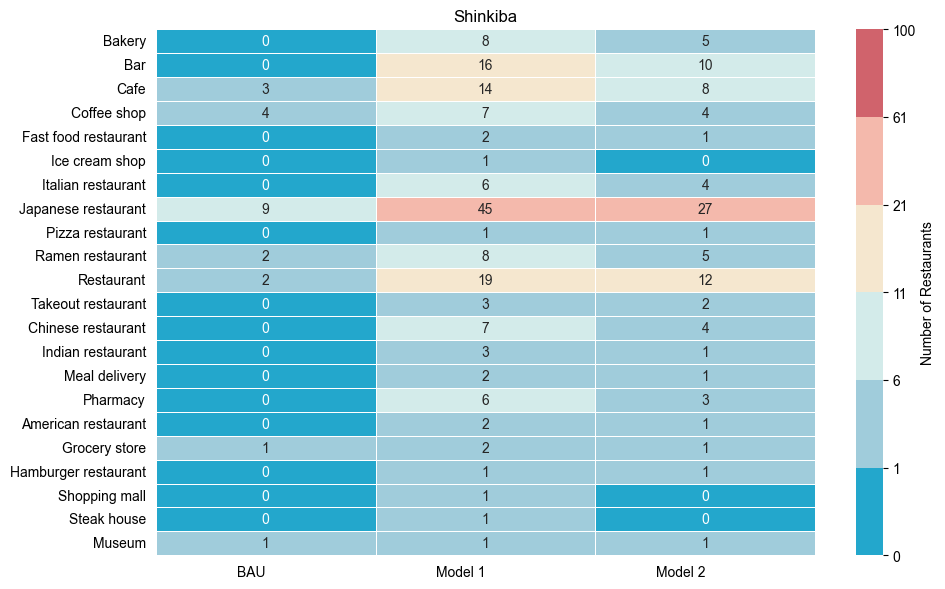

<Figure size 640x480 with 0 Axes>

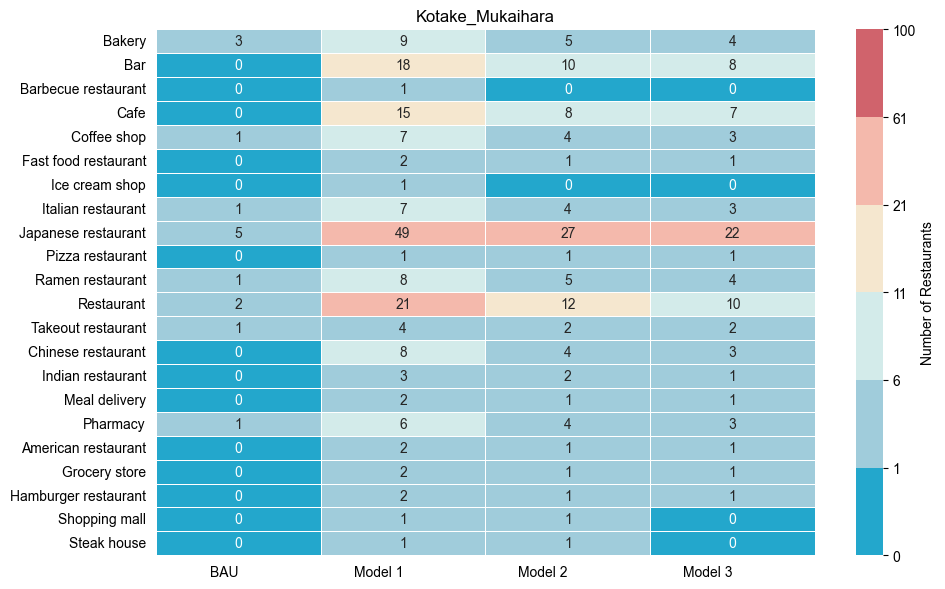

<Figure size 640x480 with 0 Axes>

In [14]:
# Set the font and color globally
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

# Load the data
file_path = 'combined_optimization_results_with_file_info.xlsx'
data = pd.read_excel(file_path, sheet_name='restaurant_distribution')

# Define the color palette
colors = [
    "#23A7CC",  # 深青色 for 0
    "#A0CCDB",  # 青色 for 1-5
    "#D3EBEA",  # 浅青色 for 6-10
    "#F5E7CF",  # 浅黄色 for 11-20
    "#F4B9AC",  # 淡黄色 for 21-60
    "#D0636C"   # 淡橙色 for >60
]

# Create a custom colormap and norm
cmap = ListedColormap(colors)
norm = BoundaryNorm([0, 1, 6, 11, 21, 61, 100], cmap.N)

# Function to plot heatmap for a specific location
def plot_location_heatmap(location, data):
    # Filter data for the specific location
    location_data = data[data['Location'] == location]
    
    # Drop 'Location' column as it's redundant now
    location_data = location_data.drop(columns=['Location'])
    
    # Set 'File_Type' as index
    location_data = location_data.set_index('File_Type')
    
    # Transpose the data for heatmap
    location_data = location_data.T
    
    # Remove columns (restaurant types) with all zeros
    location_data = location_data.loc[(location_data != 0).any(axis=1)]
    
    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        location_data, 
        cmap=cmap, 
        norm=norm,
        linewidths=.5, 
        annot=True, 
        fmt='d',
        cbar_kws={'label': 'Number of Restaurants'}
    )
    
    # Remove axis labels
    plt.xlabel('')
    plt.ylabel('')
    
    # Remove ticks
    plt.tick_params(left=False, bottom=False)
    
    plt.title(f'{location}')
    plt.xticks(rotation=0, ha='right')
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    # Save the plot as a PNG file
    plt.savefig(f'{location}_heatmap_detailed.png')

# Get the unique locations
locations = data['Location'].unique()

# Plot heatmaps for each location
for location in locations:
    plot_location_heatmap(location, data)


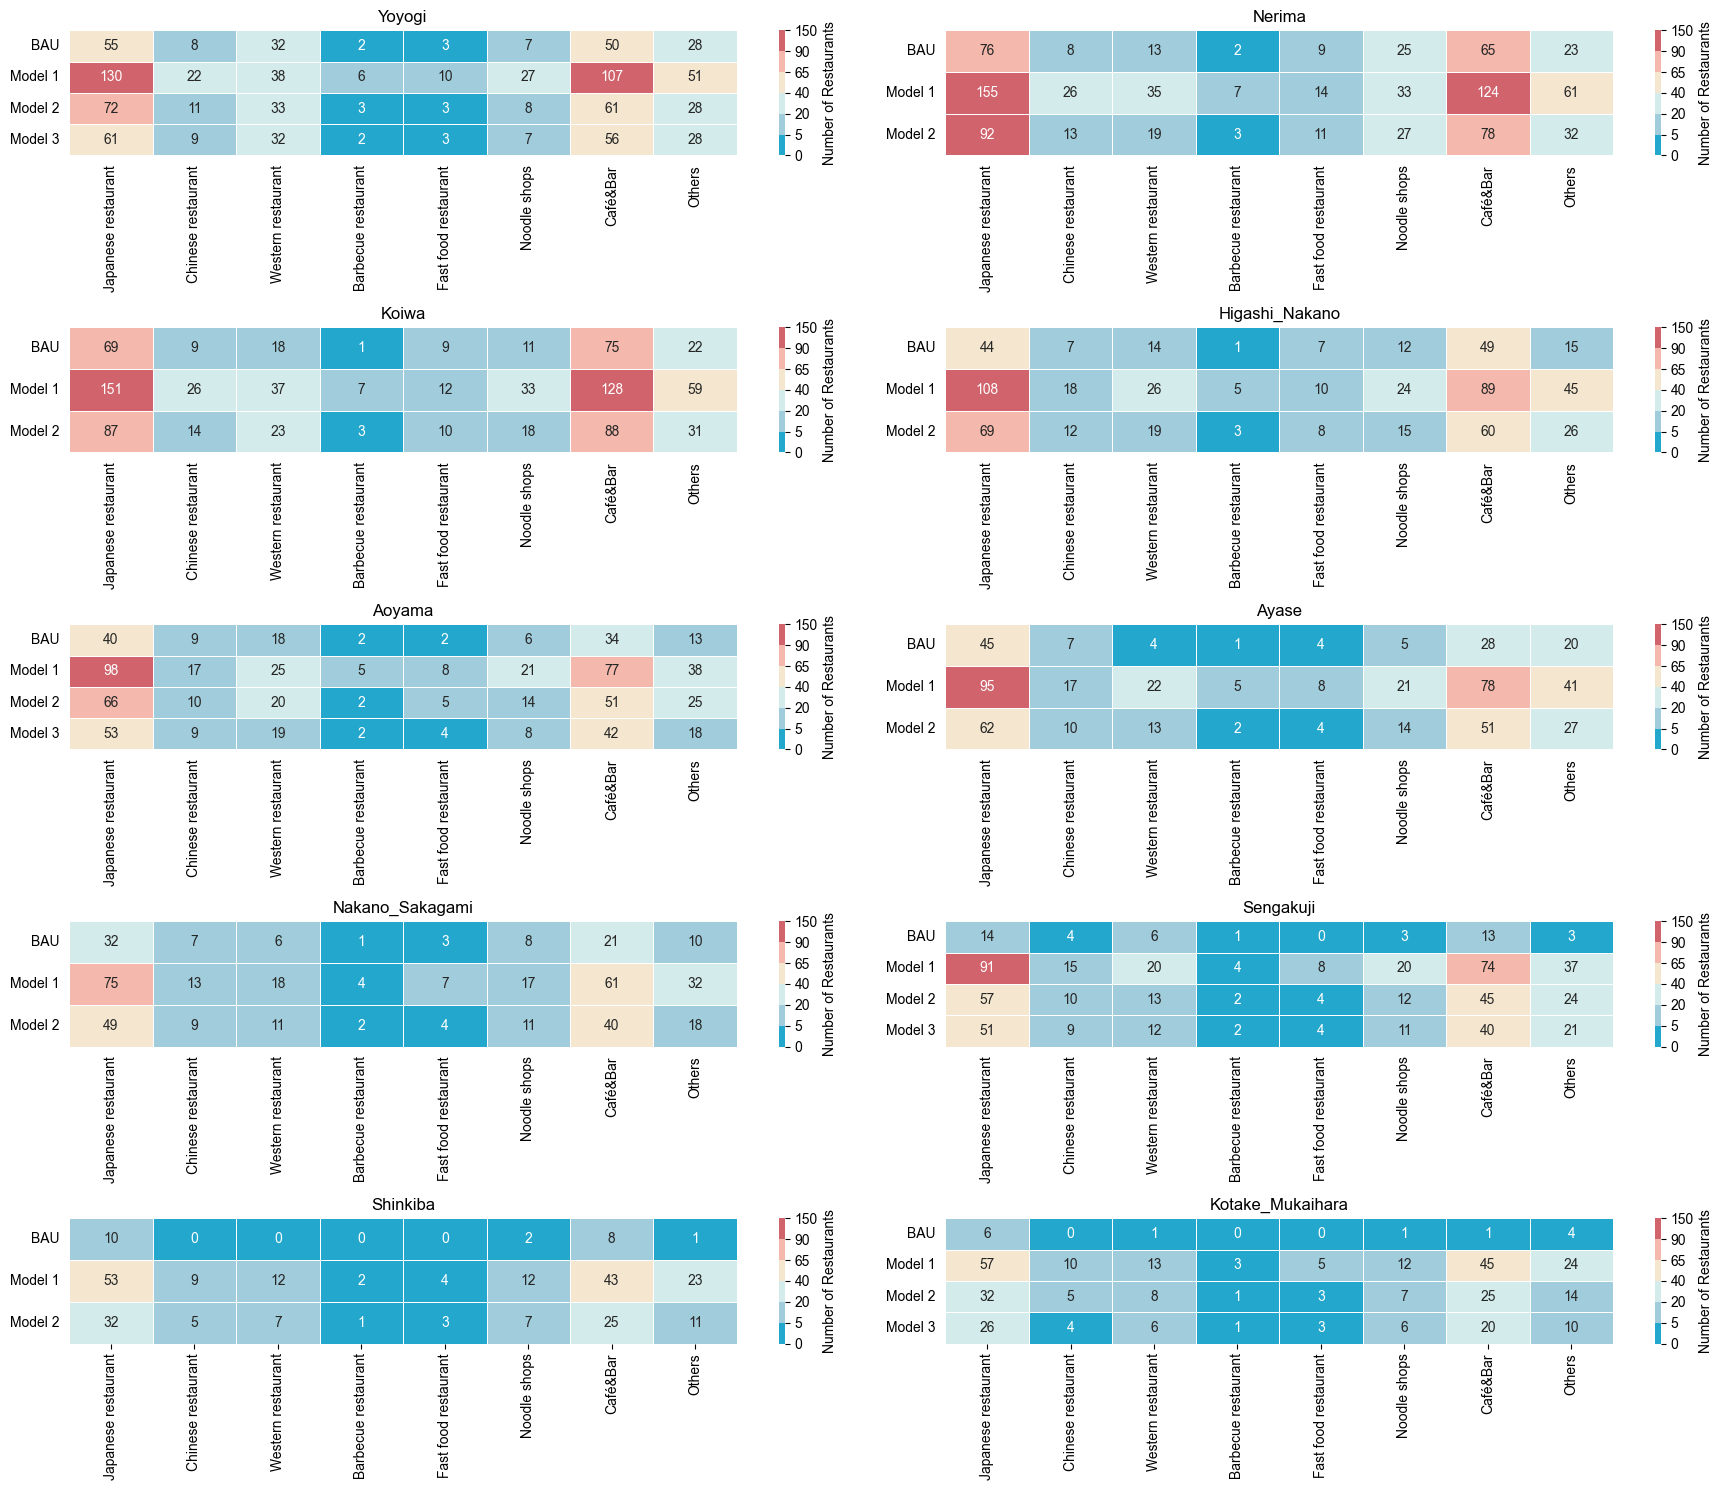

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap, BoundaryNorm

# Set the font and color globally
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

# Load the data
file_path = 'Figure_combined_optimization_results_with_file_info.xlsx'
data = pd.read_excel(file_path, sheet_name='restaurant_distribution_re')

# Define the color palette
colors = [
    "#23A7CC",  # 深青色 for 0
    "#A0CCDB",  # 青色 for 1-5
    "#D3EBEA",  # 浅青色 for 6-10
    "#F5E7CF",  # 浅黄色 for 11-20
    "#F4B9AC",  # 淡黄色 for 21-60
    "#D0636C"   # 淡橙色 for >60
]

# Create a custom colormap
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

# Define boundaries and norm
bounds = [0, 5, 20, 40, 65, 90, 150]
norm = BoundaryNorm(bounds, cmap.N)

# Function to plot heatmap for a specific location
def plot_location_heatmap(location, data, ax, show_y_label=False, show_x_label=False):
    # Filter data for the specific location
    location_data = data[data['Location'] == location]
    
    # Drop 'Location' column as it's redundant now
    location_data = location_data.drop(columns=['Location'])
    
    # Set 'File_Type' as index
    location_data = location_data.set_index('File_Type')
    
    # Transpose the data for heatmap
    location_data = location_data.T
    
    # Remove columns (restaurant types) with all zeros
    location_data = location_data.loc[(location_data != 0).any(axis=1)]
    
    sns.heatmap(
        location_data.T,  # Transpose to rotate
        cmap=cmap, 
        norm=norm,
        linewidths=.5, 
        annot=True, 
        fmt='d',
        cbar_kws={'label': 'Number of Restaurants'},
        ax=ax
    )
    
    # Set title
    ax.set_title(location)
    
    # Show or hide x and y labels
    if show_y_label:
        ax.set_ylabel('')
        ax.tick_params(left=True, bottom=False)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    else:
        ax.set_ylabel('')
        ax.tick_params(left=False, bottom=False)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    if show_x_label:
        ax.set_xlabel('')
        ax.tick_params(left=False, bottom=True)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
    else:
        ax.set_xlabel('')
        ax.tick_params(left=False, bottom=False)

# Get the unique locations
locations = data['Location'].unique()

# Create a figure with subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot heatmaps for each location
for i, location in enumerate(locations):
    show_y_label = i % 2 == 0  # Show y labels for the left column
    show_x_label = i >= len(locations) - 2  # Show x labels for the bottom row
    plot_location_heatmap(location, data, axes[i], show_y_label, show_x_label)

# Adjust layout to make space between plots
plt.tight_layout()

# Save the plot as SVG
plt.savefig('combined_heatmaps.svg', format='svg')

# Show the plot
plt.show()


,Location,Diversity,Crowdedness,Nutrition_Score,Price_Score,Carbon_Score
Unnamed: 0,,,,,,
0.775341,Yoyogi,0.588974,0.587156,0.614061,0.508219,0.558264
0.777269,Yoyogi,0.551467,0.627076,0.614061,0.508219,0.558264
0.778695,Yoyogi,0.585139,0.596295,0.614061,0.508219,0.558264
0.777775,Yoyogi,0.576275,0.590996,0.614061,0.520677,0.558264
0.762778,Nerima,0.610661,0.609797,0.462599,0.558333,0.594035
0.777379,Nerima,0.599339,0.648614,0.462599,0.558333,0.594035
0.778207,Nerima,0.623991,0.622023,0.462599,0.558333,0.594035
0.759647,Koiwa,0.600428,0.631177,0.453525,0.564646,0.580464
0.777265,Koiwa,0.594598,0.673153,0.453525,0.564646,0.580464


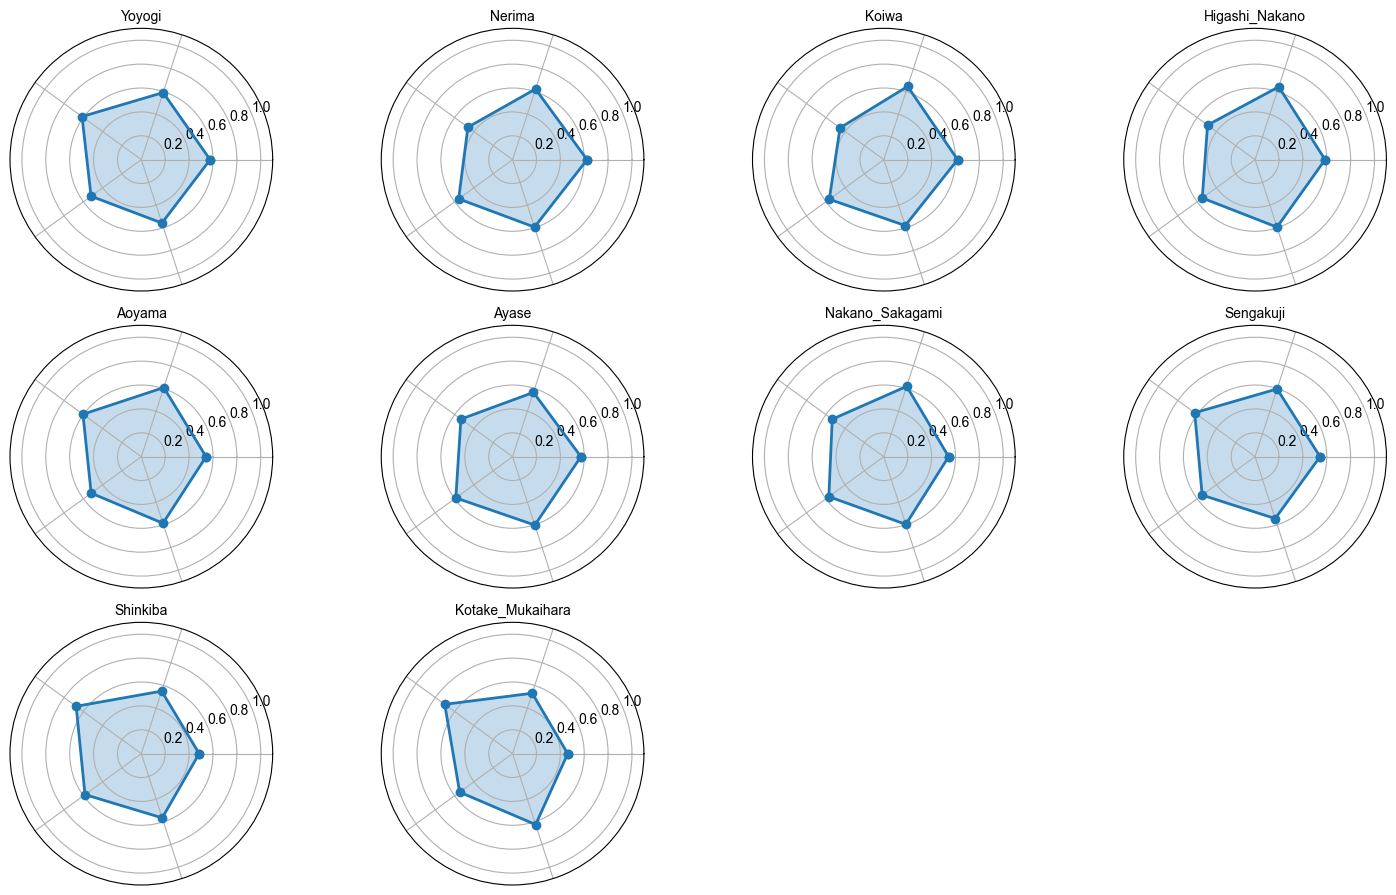

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
file_path = 'Figure_combined_optimization_results_with_file_info.xlsx'
data = pd.read_excel(file_path, sheet_name='Average_Areas_re')
data = data.iloc[0:34, 0:7]
data.set_index(data.columns[0], inplace=True)
display(data)

# Convert DataFrame to dictionary format
data_dict = {row[0]: list(row[1:]) for row in data.itertuples(index=False)}

# Function to draw a pentagon
def draw_pentagon(values, ax, label):
    angles = np.linspace(0, 2 * np.pi, 5, endpoint=False).tolist() + [0]
    values = values[:5]  # Ensure only 5 values
    values = values + [values[0]]  # Complete the loop for the pentagon
    ax.plot(angles, values, 'o-', linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_ylim(0, 1.1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels([])
    ax.set_title(label, size=10, fontname='Arial')

# Create a 5x4 subplot
fig, axs = plt.subplots(5, 4, figsize=(15, 15), subplot_kw=dict(polar=True))

# Flatten the array of axes
axs = axs.flatten()

# Plot each pentagon
for ax, (label, values) in zip(axs, data_dict.items()):
    draw_pentagon(values, ax, label)

# Hide any remaining subplots
for i in range(len(data_dict), len(axs)):
    axs[i].set_visible(False)

plt.tight_layout()

# Save the figure as SVG
plt.savefig('Radar.png', format='png')

plt.show()


,Location,Nutrition_Score,Crowdedness,Carbon_Score,Diversity,Price_Score
Unnamed: 0,,,,,,
0.777775,Yoyogi,0.614061,0.590996,0.558264,0.576275,0.520677
0.778207,Nerima,0.462599,0.622023,0.594035,0.623991,0.558333
0.777005,Koiwa,0.453525,0.645181,0.580464,0.618074,0.564646
0.777290,Higashi_Nakano,0.492335,0.641722,0.594089,0.586365,0.546753
0.777174,Aoyama,0.604294,0.608324,0.586626,0.542272,0.51955
0.779980,Ayase,0.534943,0.565966,0.60277,0.572309,0.587671
0.777112,Nakano_Sakagami,0.533999,0.619317,0.596319,0.542847,0.569388
0.777543,Sengakuji,0.625201,0.596295,0.544991,0.544206,0.547957
0.777959,Shinkiba,0.674796,0.550766,0.565557,0.484443,0.583333


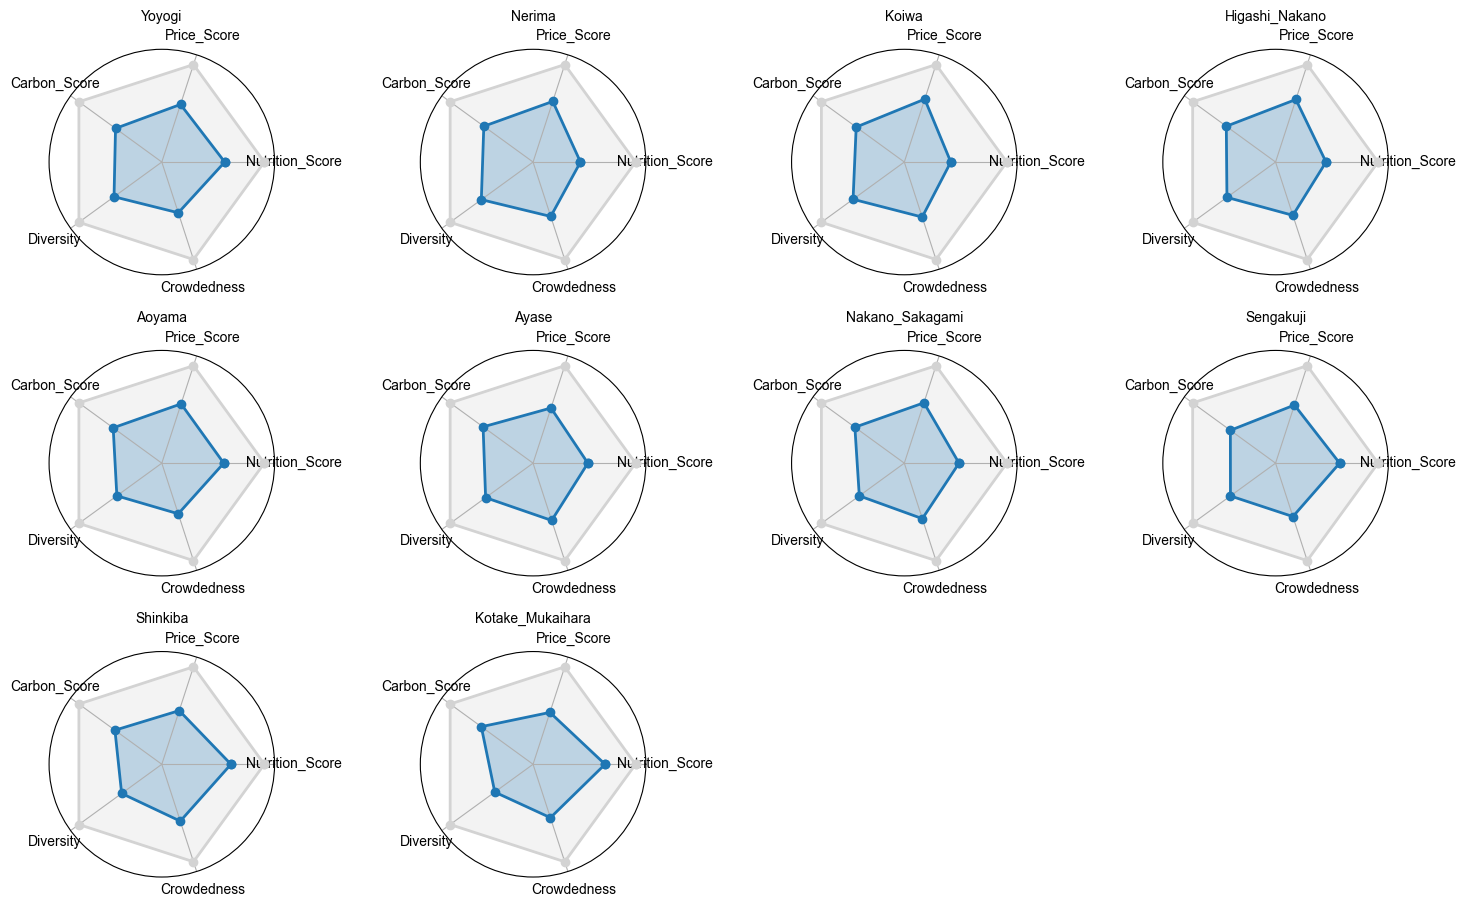

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
file_path = 'Figure_combined_optimization_results_with_file_info.xlsx'
data = pd.read_excel(file_path, sheet_name='Average_Areas_re2')
data = data.iloc[0:10, 0:7]
data.set_index(data.columns[0], inplace=True)
display(data)

# Convert DataFrame to dictionary format
data_dict = {row[0]: list(row[1:]) for row in data.itertuples(index=False)}

# Function to draw a pentagon
def draw_pentagon(values, ax, label):
    categories = ['Nutrition_Score','Price_Score','Carbon_Score','Diversity','Crowdedness']
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist() + [0]
    values = values[:len(categories)]  # Ensure only the required number of values
    values += values[:1]  # Complete the loop for the pentagon
    
    # Draw the background pentagon
    ax.plot(angles, [1] * len(angles), 'o-', linewidth=2, color='lightgray')
    ax.fill(angles, [1] * len(angles), alpha=0.25, color='lightgray')
    
    # Draw the actual data pentagon
    ax.plot(angles, values, 'o-', linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_ylim(0, 1.1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_title(label, size=10, fontname='Arial')
    ax.yaxis.set_visible(False)  # Hide the radial labels

# Create a 5x4 subplot
fig, axs = plt.subplots(5, 4, figsize=(15, 15), subplot_kw=dict(polar=True))

# Flatten the array of axes
axs = axs.flatten()

# Plot each pentagon
for ax, (label, values) in zip(axs, data_dict.items()):
    draw_pentagon(values, ax, label)

# Hide any remaining subplots
for i in range(len(data_dict), len(axs)):
    axs[i].set_visible(False)

plt.tight_layout()

# Save the figure as PNG
# plt.savefig('Radar.png', format='png')

plt.show()
